# Image Classification with Deep Learning

In [41]:
import keras 
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

In [42]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)
print()
print(ytest.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)


In [43]:
xtrain=xtrain.reshape(60000,28*28)
xtest=xtest.reshape(10000,28*28)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [44]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [45]:
xtrain=xtrain/255.
xtest=xtest/255.

In [46]:
import keras
num_classes=10
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

In [47]:
ytrain.shape

(60000, 10)

In [48]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [51]:
history=model.fit(xtrain,ytrain,
                 batch_size=128,
                 epochs=20,
                 verbose=2,
                 validation_data=(xtest,ytest))

score=model.evaluate(xtest,ytest,verbose=1)

Epoch 1/20
469/469 - 8s - loss: 0.5652 - accuracy: 0.7900 - val_loss: 0.5035 - val_accuracy: 0.8120 - 8s/epoch - 17ms/step
Epoch 2/20
469/469 - 7s - loss: 0.3855 - accuracy: 0.8567 - val_loss: 0.4098 - val_accuracy: 0.8532 - 7s/epoch - 15ms/step
Epoch 3/20
469/469 - 7s - loss: 0.3383 - accuracy: 0.8738 - val_loss: 0.3907 - val_accuracy: 0.8568 - 7s/epoch - 15ms/step
Epoch 4/20
469/469 - 7s - loss: 0.3103 - accuracy: 0.8839 - val_loss: 0.3511 - val_accuracy: 0.8771 - 7s/epoch - 15ms/step
Epoch 5/20
469/469 - 7s - loss: 0.2907 - accuracy: 0.8910 - val_loss: 0.3481 - val_accuracy: 0.8747 - 7s/epoch - 15ms/step
Epoch 6/20
469/469 - 7s - loss: 0.2771 - accuracy: 0.8967 - val_loss: 0.5505 - val_accuracy: 0.8379 - 7s/epoch - 15ms/step
Epoch 7/20
469/469 - 7s - loss: 0.2622 - accuracy: 0.8999 - val_loss: 0.3731 - val_accuracy: 0.8703 - 7s/epoch - 15ms/step
Epoch 8/20
469/469 - 7s - loss: 0.2497 - accuracy: 0.9047 - val_loss: 0.3988 - val_accuracy: 0.8611 - 7s/epoch - 15ms/step
Epoch 9/20
469/4

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ypred=model.predict(xtest)


ypred =(ypred>0.5) #convering contineous to labels
list(ypred)



313/313 [==============================] - 1s 4ms/step


[array([False, False, False, False, False, False, False, False, False,
         True]),
 array([False, False,  True, False, False, False, False, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False,  True, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False,  True, False, False, False, False,
        False]),
 array([False, False, False, False, False, False,  True, False, False,
        False]),
 array([False, False, False, False, False,  True, False, False, False,
        False]),
 array([False, False, False, False, False, False, False,  True, False,
        False]),
 array([False, False, False, False,  True, False, False, False, False,
        False]),
 array([False, False, False, Fal

In [53]:
print('classificatio report:\n',classification_report(ytest,ypred))

classificatio report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.79      0.82      1000
           3       0.92      0.90      0.91      1000
           4       0.81      0.84      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.79      0.65      0.72      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.96      0.97      1000
           9       0.95      0.97      0.96      1000

   micro avg       0.91      0.89      0.90     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.89      0.90     10000
 samples avg       0.89      0.89      0.89     10000



C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.metrics import multilabel_confusion_matrix

print('confusion matrix:\n', multilabel_confusion_matrix(ytest, ypred))

confusion matrix:
 [[[8800  200]
  [ 119  881]]

 [[8986   14]
  [  22  978]]

 [[8855  145]
  [ 210  790]]

 [[8919   81]
  [ 102  898]]

 [[8804  196]
  [ 163  837]]

 [[8976   24]
  [  33  967]]

 [[8827  173]
  [ 347  653]]

 [[8961   39]
  [  41  959]]

 [[8990   10]
  [  42  958]]

 [[8950   50]
  [  32  968]]]


# House price prediction with sequential API

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [11]:
data = pd.read_csv('houseesss.csv')

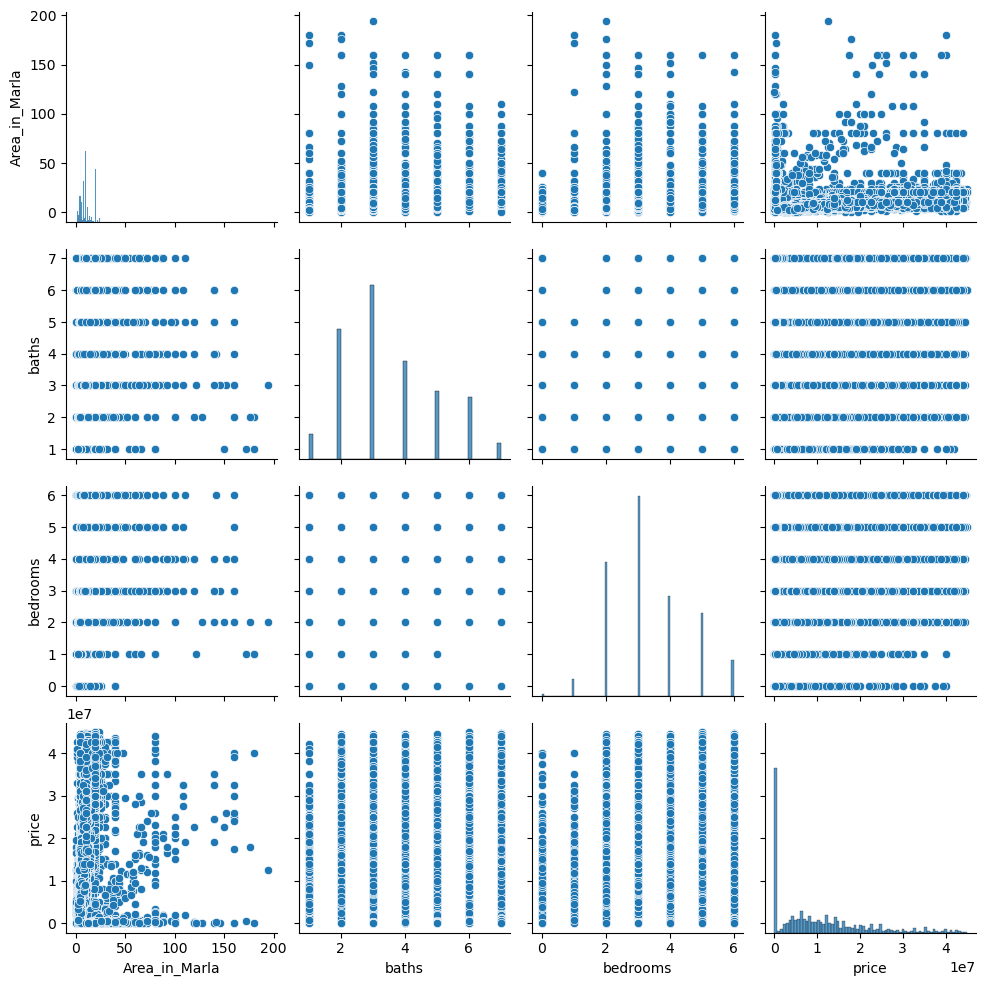

In [12]:
sns.pairplot(data)

In [13]:
data.head()

,Area_in_Marla,baths,bedrooms,price,property_type,location,city,purpose
0,4.0,2,2,10000000,Flat,G-10,Islamabad,For Sale
1,5.6,3,3,6900000,Flat,E-11,Islamabad,For Sale
2,8.0,6,5,16500000,House,G-15,Islamabad,For Sale
3,40.0,4,4,43500000,House,Bani Gala,Islamabad,For Sale
4,8.0,3,3,7000000,House,DHA Defence,Islamabad,For Sale


In [14]:
data.isna().sum()

Area_in_Marla    0
baths            0
bedrooms         0
price            0
property_type    0
location         0
city             0
purpose          0
dtype: int64

In [15]:
data.head()

,Area_in_Marla,baths,bedrooms,price,property_type,location,city,purpose
0,4.0,2,2,10000000,Flat,G-10,Islamabad,For Sale
1,5.6,3,3,6900000,Flat,E-11,Islamabad,For Sale
2,8.0,6,5,16500000,House,G-15,Islamabad,For Sale
3,40.0,4,4,43500000,House,Bani Gala,Islamabad,For Sale
4,8.0,3,3,7000000,House,DHA Defence,Islamabad,For Sale


In [34]:
x=data.iloc[:,:3]
x.head()

,Area_in_Marla,baths,bedrooms
0,4.0,2,2
1,5.6,3,3
2,8.0,6,5
3,40.0,4,4
4,8.0,3,3


In [35]:
y=data.iloc[:,3:4]
y.head()

,price
0,10000000
1,6900000
2,16500000
3,43500000
4,7000000


# Split the data

In [36]:
import sklearn
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [37]:
print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)
print()
print(ytest.shape)

(79599, 3)

(79599, 1)

(19900, 3)

(19900, 1)


# Build the model

In [38]:
model = Sequential()
model.add(Dense(11, input_shape=(3,), kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                44        
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 56 (224.00 Byte)
Trainable params: 56 (224.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(xtrain, ytrain, epochs=20)

Epoch 1/20
2488/2488 [==============================] - 6s 2ms/step - loss: 221491748667392.0000 - mean_squared_error: 221491748667392.0000
Epoch 2/20
2488/2488 [==============================] - 5s 2ms/step - loss: 221456281632768.0000 - mean_squared_error: 221456281632768.0000
Epoch 3/20
2488/2488 [==============================] - 6s 2ms/step - loss: 221397091614720.0000 - mean_squared_error: 221397091614720.0000
Epoch 4/20
2488/2488 [==============================] - 5s 2ms/step - loss: 221317517279232.0000 - mean_squared_error: 221317517279232.0000
Epoch 5/20
2488/2488 [==============================] - 4s 2ms/step - loss: 221217978056704.0000 - mean_squared_error: 221217978056704.0000
Epoch 6/20
2488/2488 [==============================] - 6s 2ms/step - loss: 221098826268672.0000 - mean_squared_error: 221098826268672.0000
Epoch 7/20
2488/2488 [==============================] - 6s 2ms/step - loss: 220960061915136.0000 - mean_squared_error: 220960061915136.0000
Epoch 8/20
2488/2488

# performance measures

In [31]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

pred= model.predict(xtest)
print(np.sqrt(mean_squared_error(ytest,pred)))
print(r2_score(ytest,pred))

622/622 [==============================] - 1s 2ms/step
14777402.21201366
-0.9377436534265426
